In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.integrate import quad

%pylab inline

Populating the interactive namespace from numpy and matplotlib


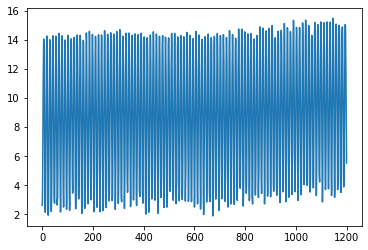

In [163]:
data = pd.read_csv('GlobalLandTemperatures_GlobalTemperatures.csv')
time_series = data.LandAverageTemperature.to_numpy()[-12 * 100:]
time = data.dt.to_numpy()[-12 * 100:]
plt.plot(time_series)

In [164]:
weight_mean = lambda year: (np.sum(year[1:-1]) + (year[0] + year[-1]) / 2) / 12

0.35993095033480216 7.590199905677654 [0.00085674]


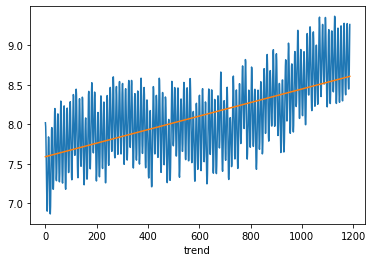

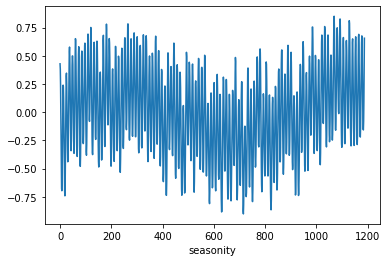

In [165]:
from sklearn.linear_model import LinearRegression
y = [weight_mean(time_series[k: k + 12]) for k in range(0, len(time_series) - 12)]
#y = time_series
x = np.array([np.arange(len(y))]).T

model = LinearRegression()
model = model.fit(x, y)
print(model.score(x, y), model.intercept_, model.coef_)
plt.plot(x, y)
trend = model.predict(x)
plt.plot(x, trend)
plt.xlabel('trend')
plt.show()
seasonity = y - trend
plt.plot(x, seasonity)
plt.xlabel('seasonity')
plt.show()

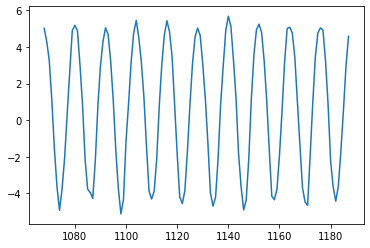

In [167]:
unregulary = time_series[6:-6] - y - seasonity
plt.plot(x[-120:], unregulary[-120:])